In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")# "whitegrid")
%matplotlib inline 

In [2]:
df_group = pd.read_csv('Case Information_batch_3.csv')
df_group.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C46369460,23.0,20 to 24,MALE,2022-01-07,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,NCR,CITY OF PARAÑAQUE,PH137604000,B. F. HOMES,PH137604007,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
1,C69025406,7.0,5 to 9,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,RIZAL,ANGONO,PH045801000,SAN ISIDRO,PH045801009,RECOVERED,NO,2022-01-06,NO,"Health Status is ""Recovered"", but no Date Reco..."
2,C6572422,27.0,25 to 29,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,PAMPANGA,SANTA RITA,PH035420000,SAN VICENTE,PH035420009,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
3,C16040871,17.0,15 to 19,FEMALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,...,CEBU,CEBU CITY (CAPITAL),PH072217000,PARDO (POB.),PH072217053,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
4,C66405262,41.0,40 to 44,MALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,...,NCR,CITY OF MAKATI,PH137602000,SINGKAMAS,PH137602027,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [3]:
dp_colm = group = pd.read_csv('Case Information_batch_3.csv', usecols = [ 'CaseCode', 'Age', 'Sex', 'ProvRes', 'CityMunRes', 'BarangayRes', 'HealthStatus' ], index_col = 'CaseCode')

In [4]:
dp_colm

,Age,Sex,ProvRes,CityMunRes,BarangayRes,HealthStatus
CaseCode,,,,,,
C46369460,23.0,MALE,NCR,CITY OF PARAÑAQUE,B. F. HOMES,RECOVERED
C69025406,7.0,FEMALE,RIZAL,ANGONO,SAN ISIDRO,RECOVERED
C6572422,27.0,FEMALE,PAMPANGA,SANTA RITA,SAN VICENTE,RECOVERED
C16040871,17.0,FEMALE,CEBU,CEBU CITY (CAPITAL),PARDO (POB.),RECOVERED
C66405262,41.0,MALE,NCR,CITY OF MAKATI,SINGKAMAS,RECOVERED
...,...,...,...,...,...,...
C32778890,50.0,MALE,NCR,CITY OF PARAÑAQUE,TAMBO,MILD
C28728958,36.0,MALE,NCR,CITY OF MAKATI,PIO DEL PILAR,MILD
C95368764,37.0,MALE,LEYTE,PALO,CAMPETIK,MILD


In [5]:
df_data = (dp_colm[dp_colm['ProvRes'] == 'ILOCOS SUR'])
df_data.head()

,Age,Sex,ProvRes,CityMunRes,BarangayRes,HealthStatus
CaseCode,,,,,,
C1262675,26.0,MALE,ILOCOS SUR,CERVANTES,COMILLAS NORTH,RECOVERED
C43874335,45.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED
C40740561,37.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED
C87078322,21.0,FEMALE,ILOCOS SUR,NARVACAN,DINALAOAN,RECOVERED
C39174719,24.0,FEMALE,ILOCOS SUR,CITY OF CANDON,CALONGBUYAN,RECOVERED


In [6]:
per_sur_nonsur = (df_data["HealthStatus"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur

MILD            83.30
RECOVERED       14.72
ASYMPTOMATIC     1.86
DIED             0.06
MODERATE         0.06
Name: HealthStatus, dtype: float64

In [7]:
per_sur_nonsur = (df_data["CityMunRes"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur

CITY OF VIGAN (CAPITAL)            21.69
BANTAY                              8.25
CABUGAO                             7.93
SINAIT                              6.78
NARVACAN                            6.40
CAOAYAN                             5.31
CITY OF CANDON                      4.41
TAGUDIN                             3.65
SANTA MARIA                         3.52
SAN VICENTE                         3.45
SANTA                               2.94
SANTA CATALINA                      2.82
SANTA CRUZ                          2.56
SANTIAGO                            2.56
SAN ESTEBAN                         2.11
SAN JUAN (LAPOG)                    2.05
SANTO DOMINGO                       1.98
SAN ILDEFONSO                       1.60
MAGSINGAL                           1.60
SALCEDO (BAUGEN)                    1.47
NAGBUKEL                            1.09
SANTA LUCIA                         1.02
CERVANTES                           0.90
SUYO                                0.83
GALIMUYOD       

In [25]:
per_sur_nonsur = (df_data["BarangayRes"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur.head((5))

POBLACION           1.86
SAN JULIAN SUR      1.73
BALALENG            1.66
BONIFACIO (POB.)    1.66
RAOIS               1.47
Name: BarangayRes, dtype: float64

In [9]:
per_sur_nonsur = (df_data["Sex"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur

FEMALE    53.61
MALE      46.39
Name: Sex, dtype: float64

In [24]:
per_sur_nonsur = (df_data["Age"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur.head((5))

23.0    3.45
24.0    2.75
30.0    2.75
25.0    2.62
27.0    2.56
Name: Age, dtype: float64

In [23]:
per_sur_nonsur = (df_data["CityMunRes"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur.head((3))

CITY OF VIGAN (CAPITAL)    21.69
BANTAY                      8.25
CABUGAO                     7.93
Name: CityMunRes, dtype: float64

<AxesSubplot:xlabel='HealthStatus', ylabel='count'>

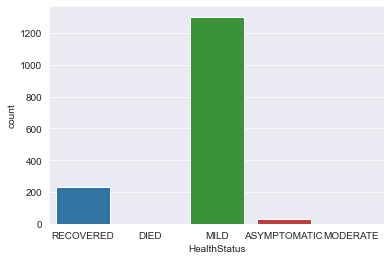

In [12]:
sns.countplot(data=df_data,x="HealthStatus")

<AxesSubplot:xlabel='Sex', ylabel='count'>

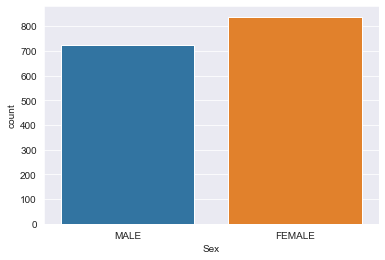

In [13]:
sns.countplot(data=df_data,x="Sex")

<AxesSubplot:xlabel='CityMunRes', ylabel='count'>

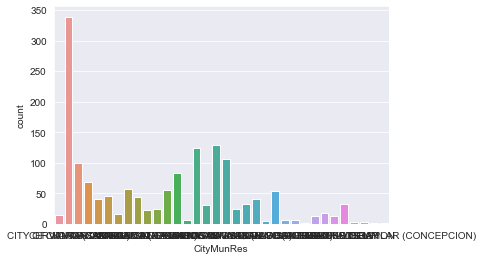

In [20]:
sns.countplot(data=df_data,x="CityMunRes")

<AxesSubplot:xlabel='Age', ylabel='Density'>

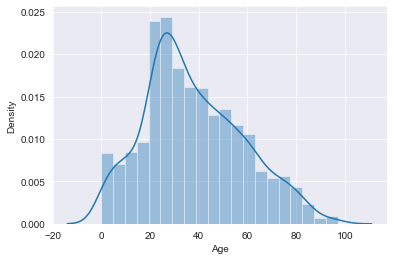

In [22]:
sns.distplot(df_data.Age)

<AxesSubplot:xlabel='Age'>

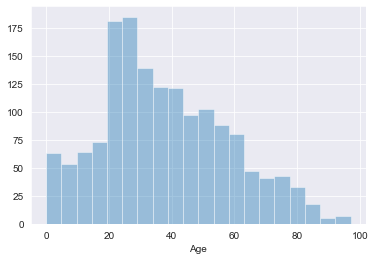

In [28]:
sns.distplot(df_data.Age, kde=False)

C:\Users\HABER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

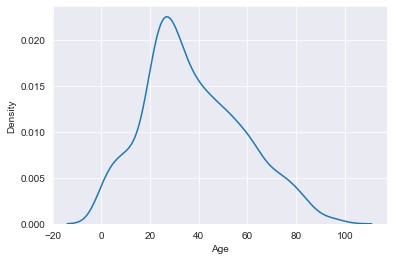

In [29]:
sns.distplot(df_data.Age, hist=False)

C:\Users\HABER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HABER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

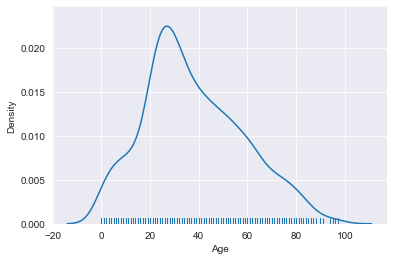

In [30]:
sns.distplot(df_data.Age, hist=False, rug=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

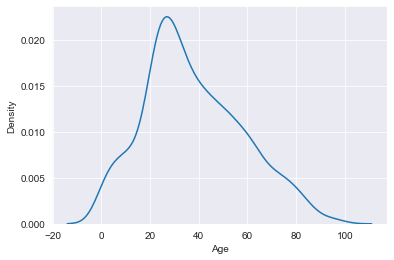

In [36]:
sns.kdeplot(df_data.Age)